In [1]:
#imports for user defined functions
import acquire as aq
import prepare as prep
import explore as ex

# Imports for arithmetic calculations and data frame manipulation
import math
import numpy as np
import pandas as pd

#Imports for statistical analysis
from scipy import stats
import statistics

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns


#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Acquire and clean using user defined functions**

In [59]:
#Acquire data using user defined function 
telco = aq.get_telco_data()
#Use prepare.py to split file
df = prep.prep_telco(telco)
train, validate, test = prep.split_telco_data(df)

Using cached csv...


# Data Exploration

## Overview exploration of churn vs all variables ##

In [8]:
#Exploring my target -- Churn
train.churn.value_counts(normalize=True)

0    0.734315
1    0.265685
Name: churn, dtype: float64

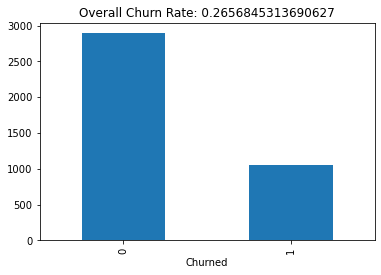

In [9]:
train.churn.value_counts().sort_index().plot.bar()
churn_rate = train.churn.mean()
plt.title(f'Overall Churn Rate: {churn_rate}')
plt.xlabel('Churned')
plt.show()

Text(0, 0.5, 'Correlation')

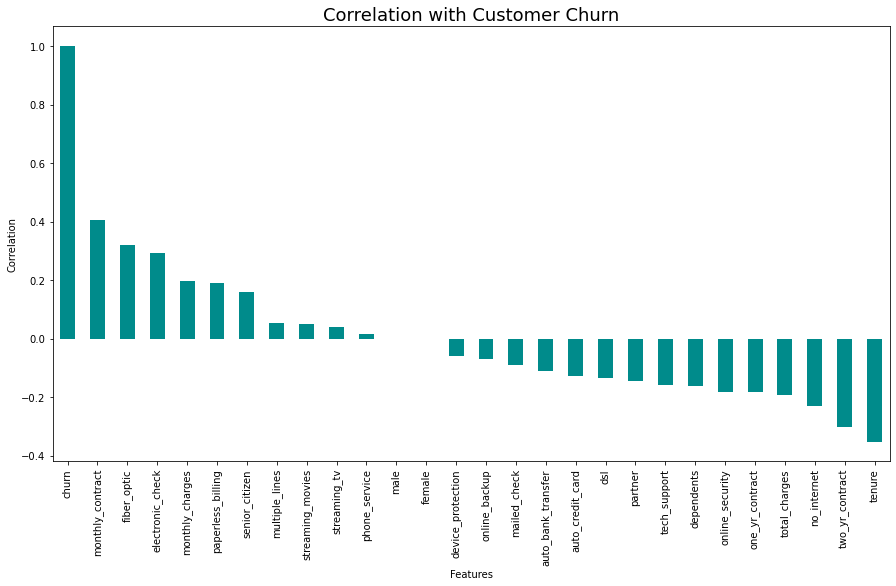

In [10]:
# Checking churn correlation vs all variables

quant_vars = ['tenure', 'monthly_charges', 'total_charges']
cat_vars = list((train.columns).drop(quant_vars))
target = train.churn

plt.figure(figsize= (15, 8))
train.corr()['churn'].sort_values(ascending=False).plot(kind='bar', color = 'darkcyan')
plt.title('Correlation with Customer Churn', fontsize = 18)
plt.xlabel('Features')
plt.ylabel('Correlation')

Initial Takeways
- The top 5 features correlated with churn: monthly_contract, fiber_optic, electronic_check, monthly_charges, paperless_billing
- Customers with yearly contracts have negative correlations with churn. 
- Automatic payments have a negative correlation with churn in contrast to electronic_checks which are manual. 
- Gender has virtually no correlation with churn.

## Answering my initial questions from planning stage: ##

## Is there a service type more associated with churn than expected? ##
**Internet service.**

In [12]:
train.columns

Index(['customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'female', 'male', 'monthly_contract', 'one_yr_contract',
       'two_yr_contract', 'auto_bank_transfer', 'auto_credit_card',
       'electronic_check', 'mailed_check', 'dsl', 'fiber_optic',
       'no_internet'],
      dtype='object')

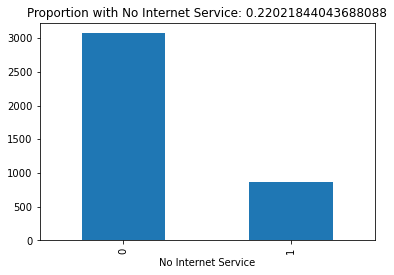

In [13]:
# Check proportion of those who have internet service overall
## For no_internet 0 indicates they have internet service and 1 indicates they do not
train.no_internet.value_counts().sort_index().plot.bar()
rate = train.no_internet.mean()
plt.title(f'Proportion with No Internet Service: {rate}')
plt.xlabel('No Internet Service')
plt.show()

*This visualization may be a bit confusing at first but the 0 is what indicates who has internet -- so about 78% of customers do have some form of internet service.*

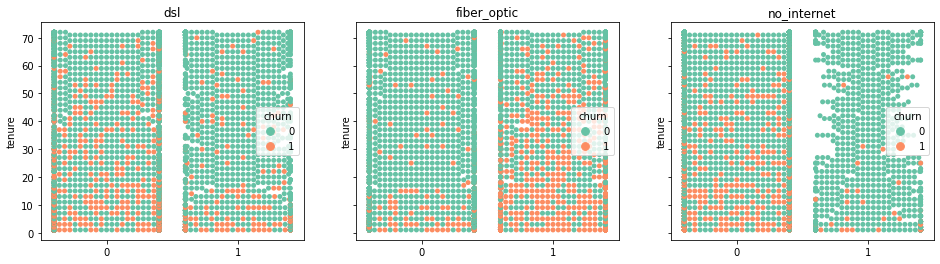

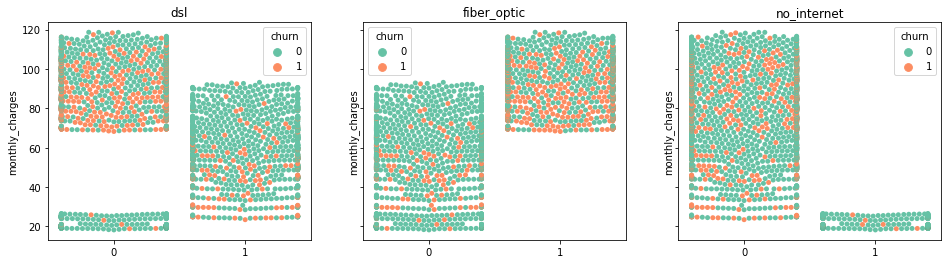

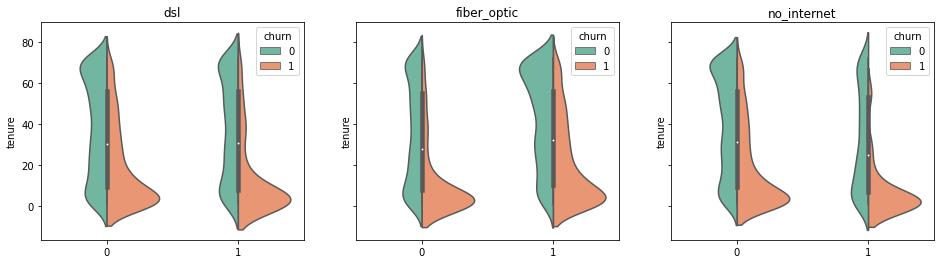

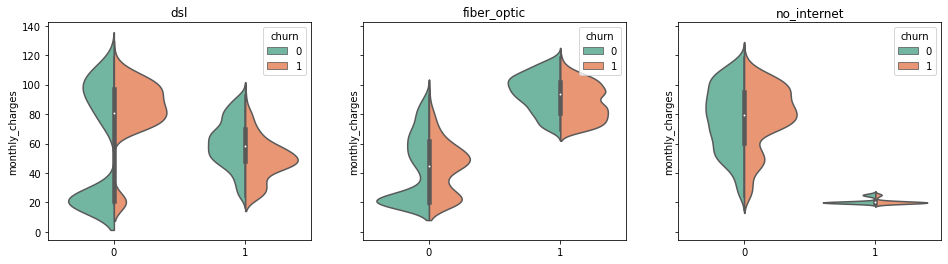

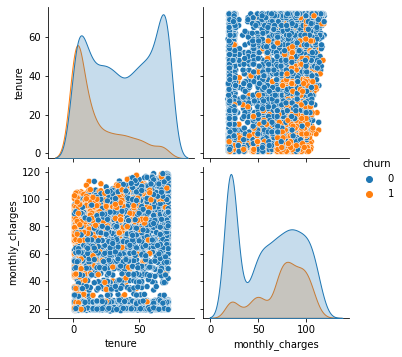

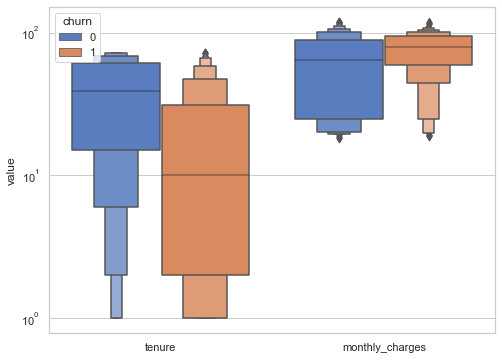

In [14]:
#Conduct multivariate statistic visualiazation
target = 'churn'
cat_vars = ['dsl', 'fiber_optic', 'no_internet']
quant_vars = ['tenure', 'monthly_charges']

ex.explore_multivariate(train, target, cat_vars, quant_vars)

Takeaways:
- Visualizations indicate a higher rate of churn for those who have internet service and particularly high churn amongst those with fiber optic internet.
- Fiber optic seems to have much higher monthly charges on average -- that said monthly charges overall doesn't seem to be a huge indicator of churn. 

In [15]:
#Chi square test on no_internet vs. churn
## For no_internet 0 indicates they have internet service and 1 indicates they do not

cat_var = 'no_internet'
target= 'churn'
alpha =.05


observed = pd.crosstab(train[cat_var], train[target])

H0: Having internet service is independent of churning.

Ha: Having internet service and churning are dependent on eachother. They are correlated.

In [16]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(208.5364767947143, 2.8653012180661676e-47)

In [17]:
# Outcome
if p < alpha:
    print('We reject the null hypothesis that the variables are independent of eachother. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that the variables are independent of eachother. There is no significant statistical correlation.')

We reject the null hypothesis that the variables are independent of eachother. There is a correlation.


In [18]:
#Chi Square test on fiber_optic vs Churn
cat_var = 'fiber_optic'
target= 'churn'
observed = pd.crosstab(train[cat_var], train[target])

H0: Having dsl service is independent of churning.

Ha: Having dsl service and churning are dependent on eachother. They are correlated.

In [19]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(405.92112170517066, 2.831419548361709e-90)

In [22]:
# Outcome
if p < alpha:
    print('We reject the null hypothesis that the variables are independent of eachother. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that the variables are independent of eachother. There is no significant statistical correlation.')

We reject the null hypothesis that the variables are independent of eachother. There is a correlation.


## Is there a service type more associated with churn than expected? ##
**Phone service**

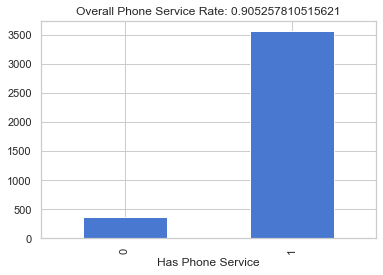

In [23]:
# Check proportion of those who have phone service overall
train.phone_service.value_counts().sort_index().plot.bar()
rate = train.phone_service.mean()
plt.title(f'Overall Phone Service Rate: {rate}')
plt.xlabel('Has Phone Service')
plt.show()

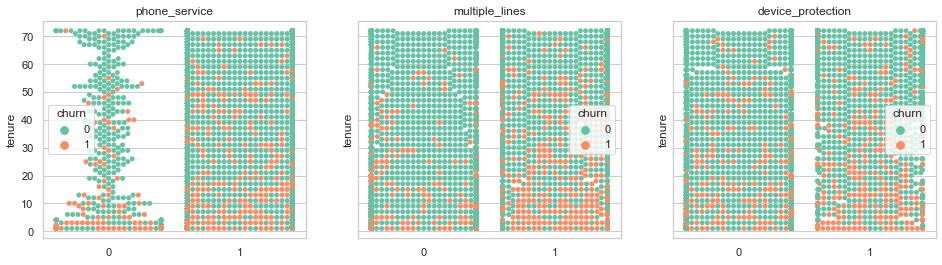

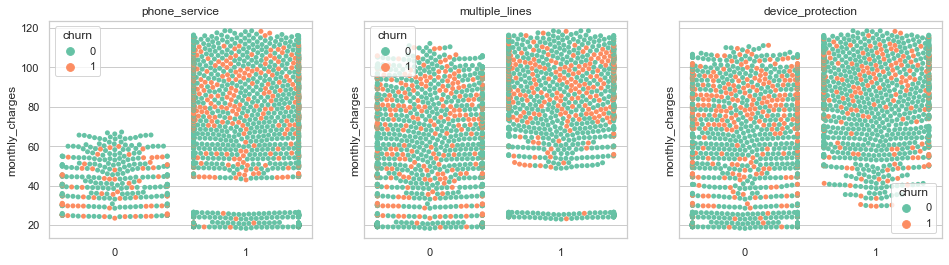

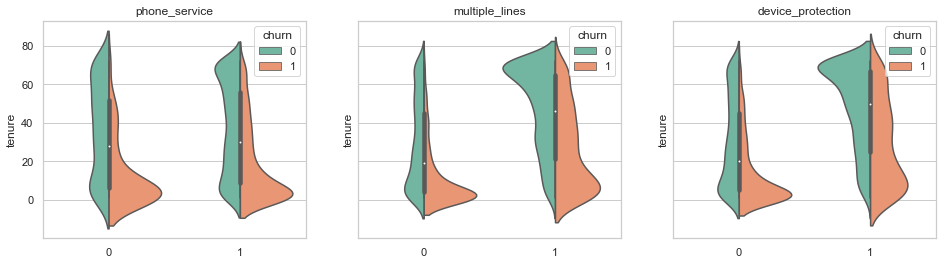

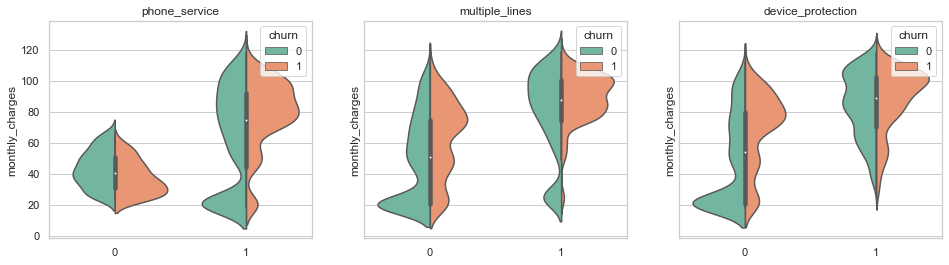

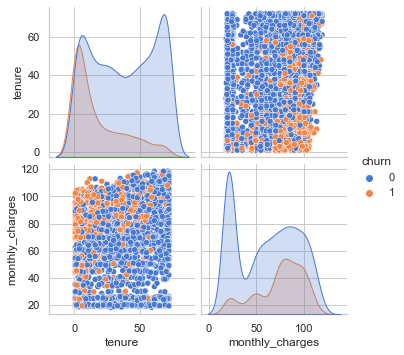

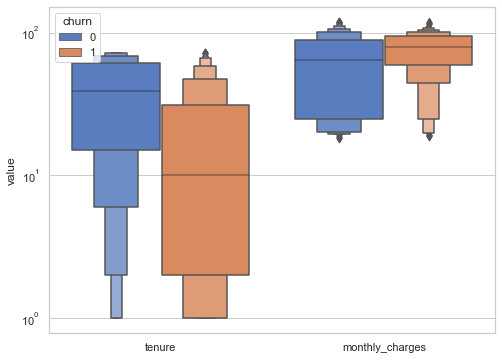

In [24]:
#Conduct multivariate statistic visualiazation
target = 'churn'
cat_vars = ['phone_service', 'multiple_lines', 'device_protection']
quant_vars = ['tenure', 'monthly_charges']

ex.explore_multivariate(train, target, cat_vars, quant_vars)

Takeaways:

- Most customers have phone service.
- Customers with phone service do churn at a slightly higher rate but since around 90% of customers have phone service this doesn't seem that significant.
- Customers with multiple lines do seem to churn at a slighly higher rate.
- Again, higher monthly charges does affect churn, which makes sense since higher monthly charges would be associated with having multiple lines or the more expensive fiber optic service.

In [25]:
#Chi Square test on multiple_lines vs Churn
cat_var = 'multiple_lines'
target= 'churn'

observed = pd.crosstab(train[cat_var], train[target])

H0: Having multiple phone lines is independent of churning.

Ha: Having multiple phone lines and churning are dependent on eachother. They are correlated.

In [26]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(10.830305478664364, 0.0009985216252164028)

In [27]:
# Outcome
if p < alpha:
    print('We reject the null hypothesis that the variables are independent of eachother. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that the variables are independent of eachother. There is no significant statistical correlation.')

We reject the null hypothesis that the variables are independent of eachother. There is a correlation.


## Is a certain payment or contract type associated with higher churn? 
**Payment Type**

In [28]:
train.columns

Index(['customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'female', 'male', 'monthly_contract', 'one_yr_contract',
       'two_yr_contract', 'auto_bank_transfer', 'auto_credit_card',
       'electronic_check', 'mailed_check', 'dsl', 'fiber_optic',
       'no_internet'],
      dtype='object')

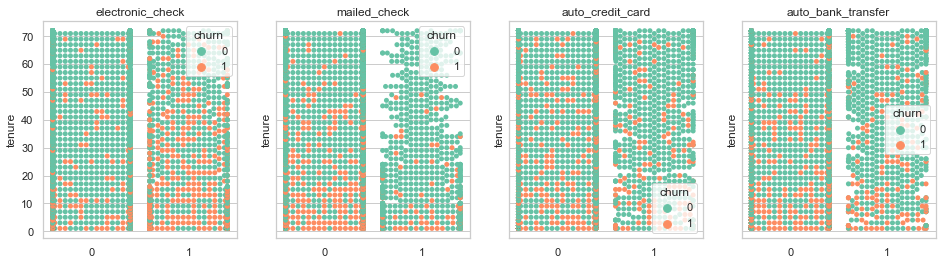

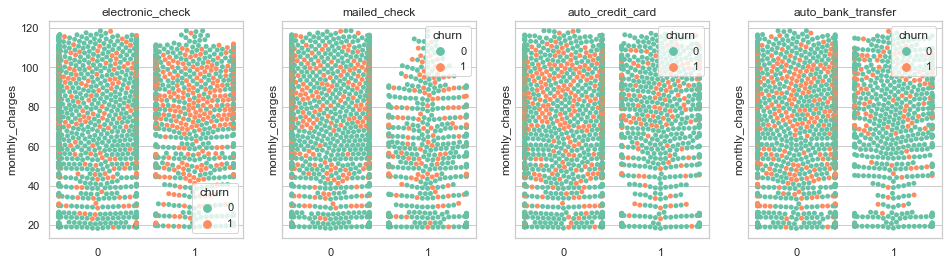

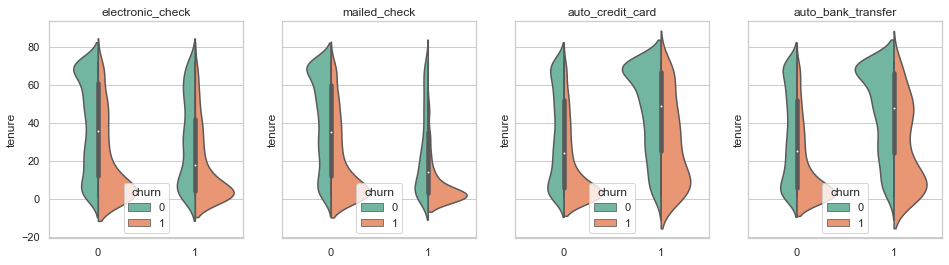

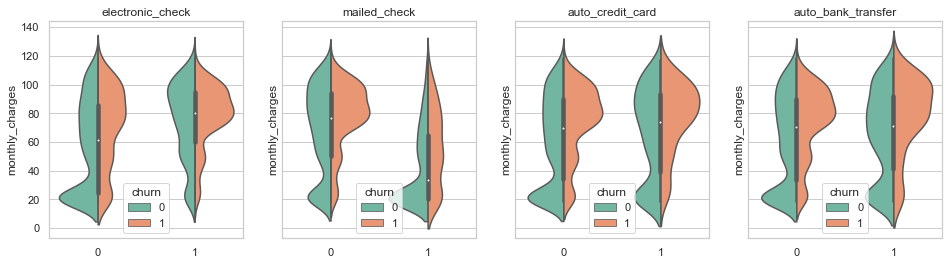

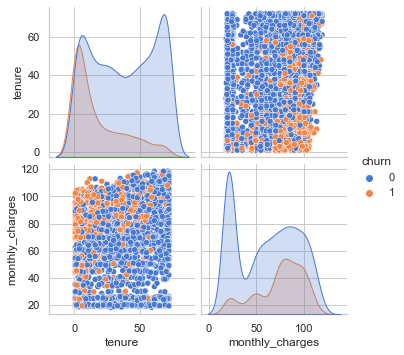

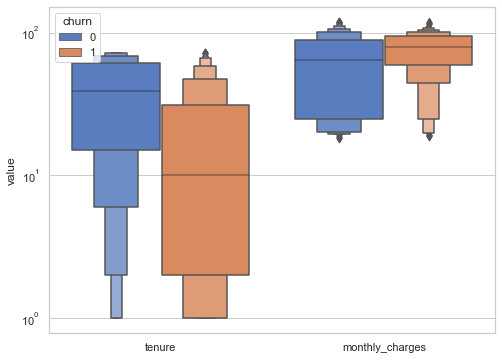

In [29]:
#Conduct multivariate statistic visualization
target = 'churn'
cat_vars = ['electronic_check', 'mailed_check', 'auto_credit_card', 'auto_bank_transfer']
quant_vars = ['tenure', 'monthly_charges']

ex.explore_multivariate(train, target, cat_vars, quant_vars)

Takeaways:
    
- Those who pay by electronic check churn at a much higher rate than other payment types. 
- Mailed checks, and the automatic payments types don't seem to be significantly correlated with churn. 

In [ ]:
#Chi Square test on electronic_check vs Churn
cat_var = 'electronic_check'
target= 'churn'

observed = pd.crosstab(train[cat_var], train[target])

H0: Paying by electronic check is independent of churning.

Ha: Paying by electronic check and churning are dependent on eachother. They are correlated.

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

In [ ]:
# Outcome
if p < alpha:
    print('We reject the null hypothesis that the variables are independent of eachother. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that the variables are independent of eachother. There is no significant statistical correlation.')

## Is a certain payment or contract type associated with higher churn? 
**Contract Type**

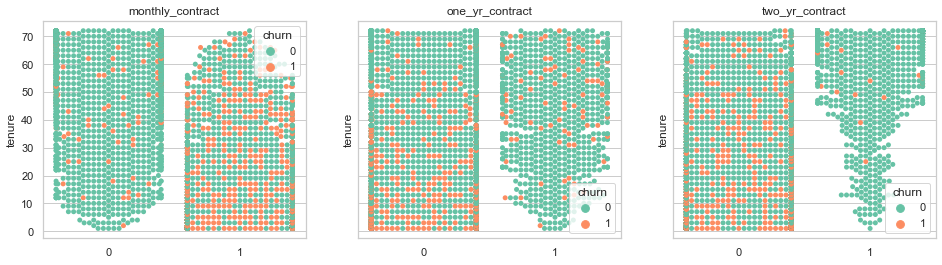

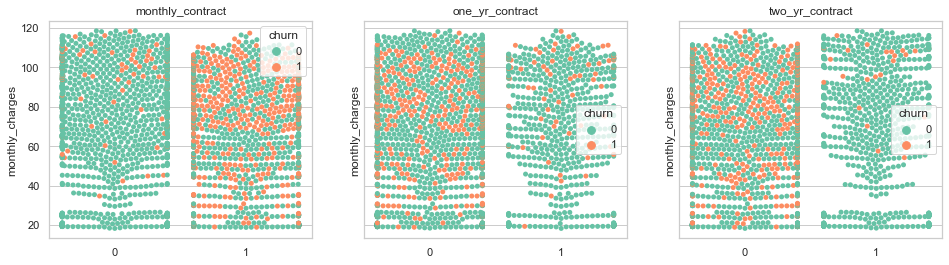

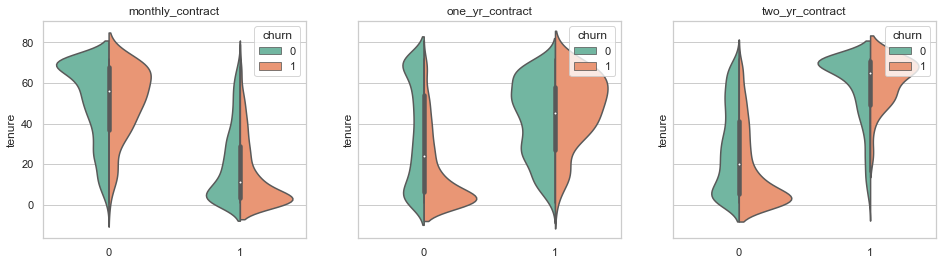

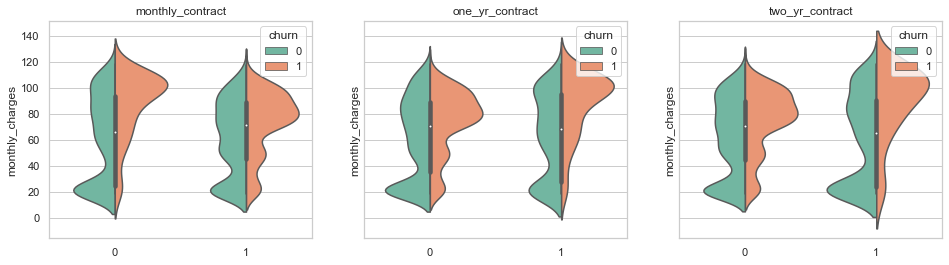

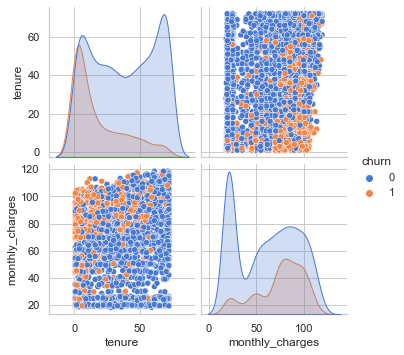

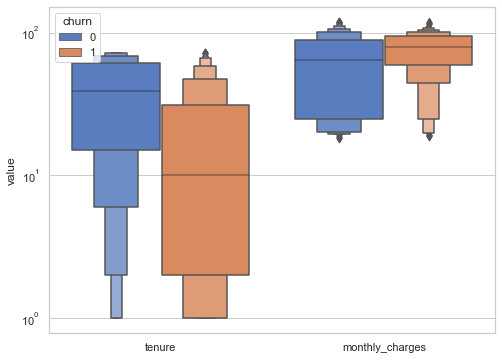

In [31]:
#Conduct multivariate statistic visualization
target = 'churn'
cat_vars = ['monthly_contract', 'one_yr_contract', 'two_yr_contract']
quant_vars = ['tenure', 'monthly_charges']

ex.explore_multivariate(train, target, cat_vars, quant_vars)

Takeaways:
- Monthly contracts have much much higher churn than yearly contracts. 

In [32]:
#Chi Square test on monthly_contract vs Churn

cat_var = 'monthly_contract'
target= 'churn'

observed = pd.crosstab(train[cat_var], train[target])

H0: Having a monthly contract is independent of churning.

Ha: Having a monthly contract and churning are dependent on eachother. They are correlated.

In [34]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(649.1331915563476, 3.4484593947893894e-143)

In [35]:
# Outcome
if p < alpha:
    print('We reject the null hypothesis that the variables are independent of eachother. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that the variables are independent of eachother. There is no significant statistical correlation.')

We reject the null hypothesis that the variables are independent of eachother. There is a correlation.


## Do customers who churn have higher average monthly charges? ##

(Text(0.5, 1.0, 'monthly_charges'),
 count    3937.000000
 mean       64.805131
 std        30.294804
 min        18.250000
 25%        34.700000
 50%        70.250000
 75%        90.300000
 max       118.650000
 Name: monthly_charges, dtype: float64)

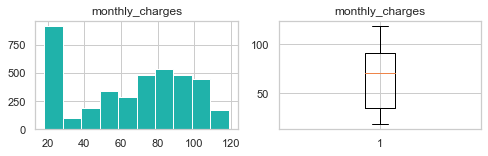

In [36]:
#Univariate exploration of monthly charges
quant_var = 'monthly_charges'
ex.explore_univariate_quant(train, quant_var)

Takeaways:
- Fairly normal distribution but with most chargest around the $20/month range.

Hypotheses
    
H0: The mean of churned customers' monthly charges is less than or equal to not churned customers.

Ha: The mean of churned customers' monthly charges mean is more than not churned customers.

In [38]:
#Subsetting data between churned and not churned
churned = train[train.churn == 1]
not_churned = train[train.churn == 0]

In [39]:
#Subsetting data to include mean of monthly charges
churn_monthly_charges = churned.monthly_charges
overall_mean = train.monthly_charges.mean()

In [40]:
# Checking variances
churned.monthly_charges.var(), not_churned.monthly_charges.var()

(604.8633241695393, 982.7932072180829)

In [41]:
# What's the overall mean?
overall_mean

64.80513081026147

In [42]:
# What's the mean of monthly_charges amongst customers who churned?
churn_monthly_charges.mean()

74.71921606118552

In [43]:
# Conduct a one sample t-test

t, p = stats.ttest_1samp(churn_monthly_charges, overall_mean)

print(t, p/2, alpha)

13.037366230308015 2.0798982128378347e-36 0.05


In [44]:
if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis.")


We reject the null hypothesis.


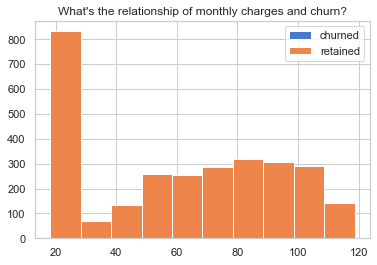

In [45]:
plt.title("What's the relationship of monthly charges and churn?")
plt.hist(churned.monthly_charges, label="churned")
plt.hist(not_churned.monthly_charges, label="retained")
plt.legend()
plt.show()

*This visualization doesn\'t show a clear distinction.*

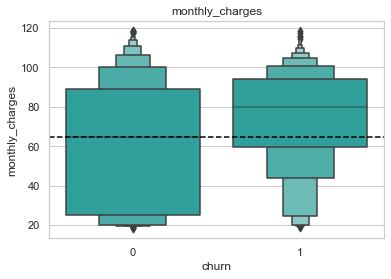

In [46]:
ex.plot_boxen(train, target, quant_var)

*This visualization clearly shows the average monthly charges and that they are higher among customers who churned.*

## Do monthly charges increase with tenure? How does this affect churn? ##

Hypothesis

H0: There is no linear correlation between monthly charges and tenure.
    
Ha: There is a linear correlation between monthly charges and tenrue.

In [48]:
# Calculating Pearson's Correlation Coefficient -- Tenure vs. Monthly Charges
x = train.tenure
y= train.monthly_charges

corr, p = stats.pearsonr(x, y)
corr, p

(0.2584558724797175, 4.133540022116172e-61)

In [49]:
# Outcome
alpha = .05
if p < alpha:
    print('We reject the null hypothesis that there is no linear correlation. There is a correlation.')
else:
    print('We cannot reject the null hyptohesis that there is no linear correlation.')

We reject the null hypothesis that there is no linear correlation. There is a correlation.


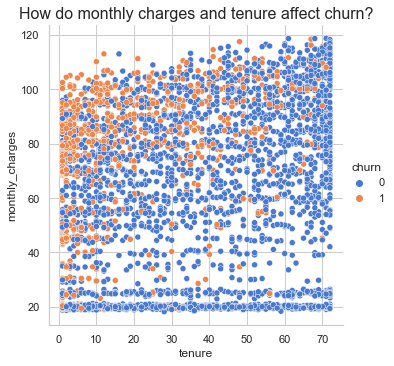

In [50]:
# Let's see how monthly charges and tenure intereact with churn
sns.relplot(x='tenure', y='monthly_charges', hue='churn', data=train)
plt.title('How do monthly charges and tenure affect churn?', fontsize= 16)
plt.show()

*I like this visualization as it clearly shows that those who churn are paying more on average and shows a general range for their tenure when they churn: most before the 1 yr mark.*

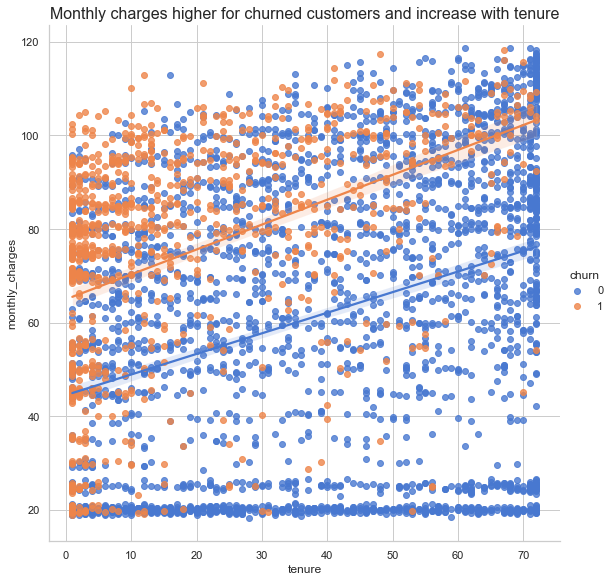

In [52]:
sns.lmplot(x = 'tenure', y= 'monthly_charges', hue='churn', data=train, size = 8)
plt.title('Monthly charges higher for churned customers and increase with tenure', fontsize= 16)
plt.show()

*This visualization does a good job showcasing how monthly charges go up with tenure, as well as the higher monthly charges for customesrs who churned.*

**New Related Question: What is the average tenure for those who churn? In other words, at what month do most customers usually churn?**

In [54]:
# Calculating average tenure at churn
churned.tenure.mean()

18.325047801147228

In [55]:
churned.tenure.describe()

count    1046.000000
mean       18.325048
std        19.960763
min         1.000000
25%         2.000000
50%        10.000000
75%        31.000000
max        72.000000
Name: tenure, dtype: float64

Text(0.5, 1.0, 'Distribution of tenure for churned customers')

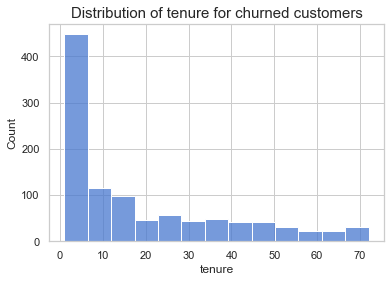

In [56]:
sns.histplot(data=churned, x='tenure')
plt.title('Distribution of tenure for churned customers', fontsize= 15)

Text(0.5, 1.0, 'Distribution of tenure')

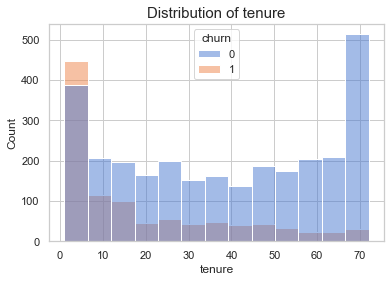

In [57]:
sns.histplot(data=train, x='tenure', hue= 'churn')
plt.title('Distribution of tenure', fontsize='15')

*While the average tenure at churn is around 18 months, these visualizations show most customers are churning around before the 10 month mark.*